In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

 # Exploratory Data Analysis (EDA)
 # Basic Dataset Information

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
print("missing values:\n",df.isnull().sum())

missing values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


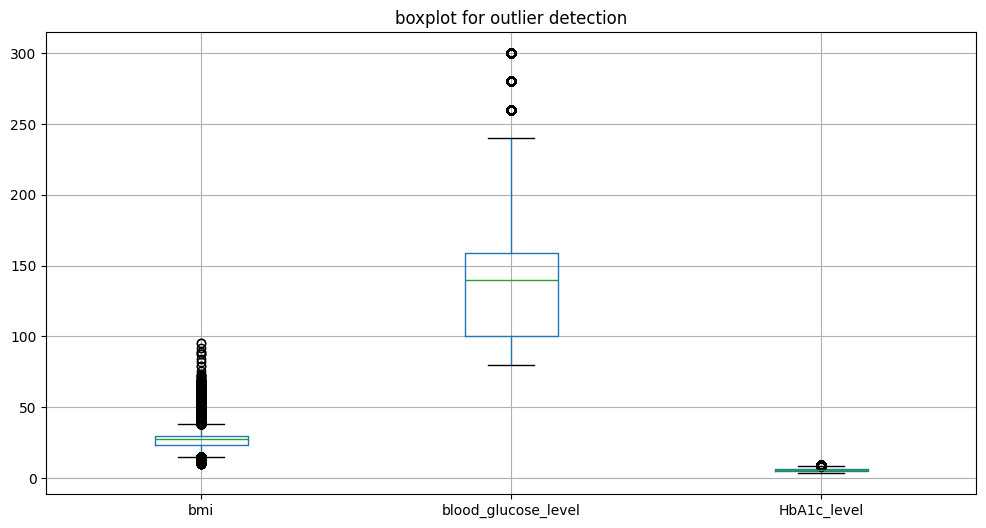

In [7]:
plt.figure(figsize = (12,6))
df.boxplot(column = ['bmi','blood_glucose_level','HbA1c_level'])
plt.title("boxplot for outlier detection")
plt.show()

In [8]:
gender_counts = df['gender'].value_counts()
smoking_counts = df['smoking_history'].value_counts()
print("gender distribution:\n",gender_counts)
print("\n")
print("smoking history distribution:\n",smoking_counts)

gender distribution:
 gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


smoking history distribution:
 smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [9]:
diabeties_count=df['diabetes'].value_counts()
print("diabeties class distribution:\n",diabeties_count)

diabeties class distribution:
 diabetes
0    91500
1     8500
Name: count, dtype: int64


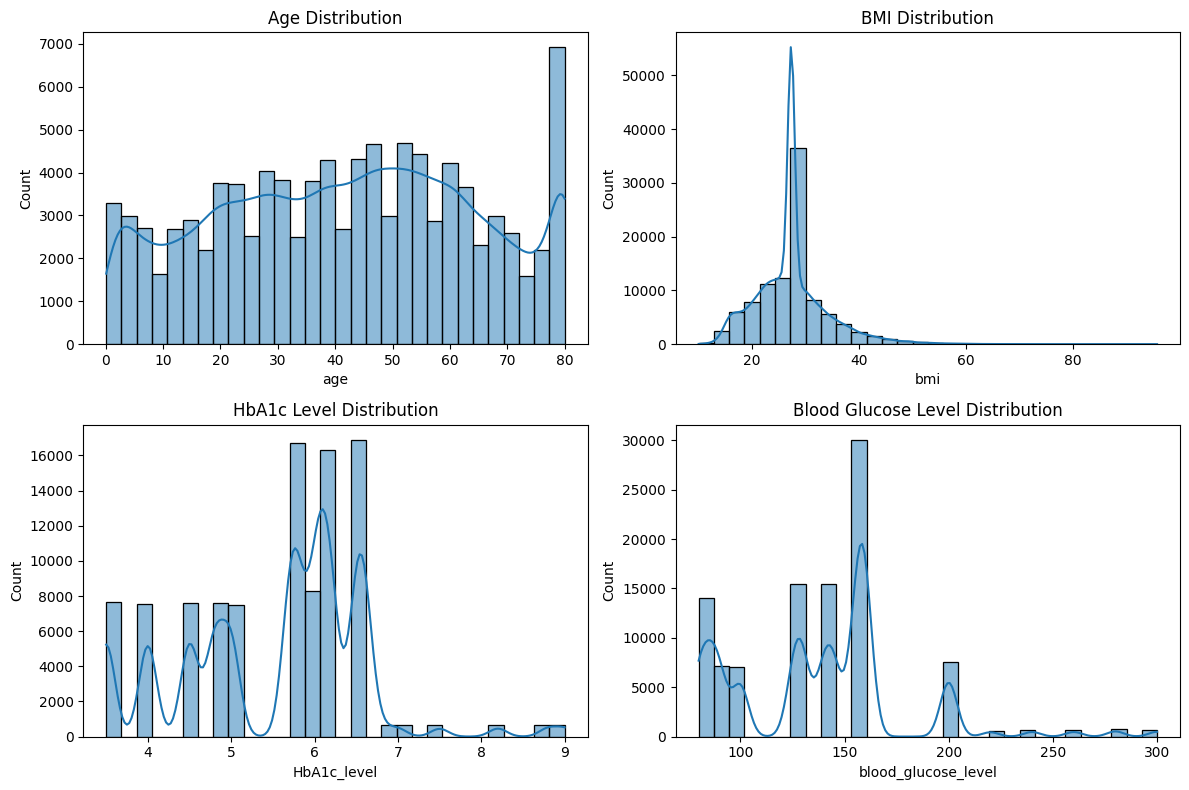

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution")
sns.histplot(df['bmi'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("BMI Distribution")
sns.histplot(df['HbA1c_level'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("HbA1c Level Distribution")
sns.histplot(df['blood_glucose_level'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Blood Glucose Level Distribution")
plt.tight_layout()
plt.show()


In [11]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)
print(df['bmi_category'].value_counts())

bmi_category
Overweight     45751
Obese          23536
Normal         22219
Underweight     8494
Name: count, dtype: int64


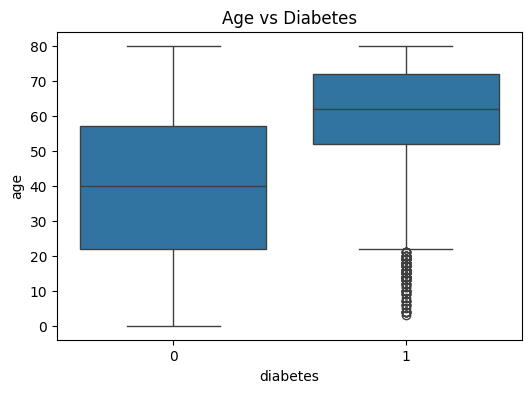

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['diabetes'], y=df['age'])
plt.title("Age vs Diabetes")
plt.show()


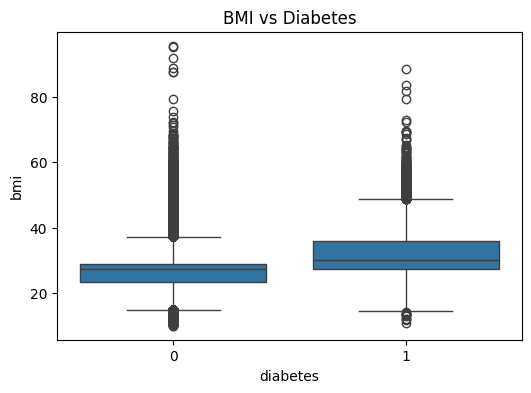

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['diabetes'], y=df['bmi'])
plt.title("BMI vs Diabetes")
plt.show()


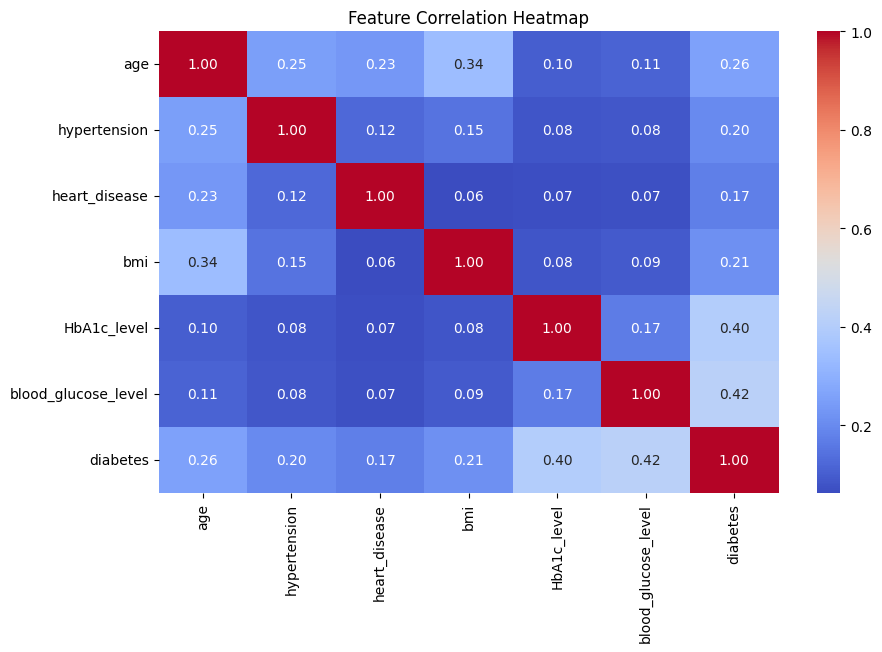

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [15]:
comorbidity_counts = df.groupby(['hypertension', 'heart_disease'])['diabetes'].mean()
print("Comorbidity Analysis:\n", comorbidity_counts)


Comorbidity Analysis:
 hypertension  heart_disease
0             0                0.061494
              1                0.300397
1             0                0.263358
              1                0.390830
Name: diabetes, dtype: float64


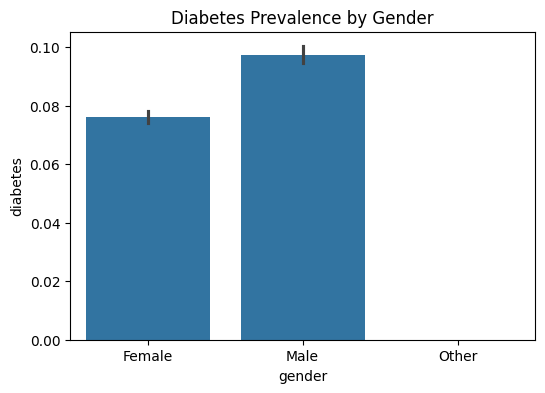

In [16]:
plt.figure(figsize=(6, 4))
sns.barplot(x='gender', y='diabetes', data=df, estimator=np.mean)
plt.title("Diabetes Prevalence by Gender")
plt.show()

In [17]:
high_risk = df[(df['bmi'] > 40) | (df['blood_glucose_level'] > 200)]
print("High-Risk Cases:\n")
high_risk


High-Risk Cases:



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category
11,Female,54.0,0,0,former,54.70,6.0,100,0,Obese
38,Male,50.0,1,0,current,27.32,5.7,260,1,Overweight
39,Female,34.0,0,0,never,56.43,6.2,200,0,Obese
59,Female,67.0,0,0,never,63.48,8.8,155,1,Obese
87,Female,36.0,0,0,current,32.27,6.2,220,1,Obese
...,...,...,...,...,...,...,...,...,...,...
99953,Female,59.0,1,0,ever,60.52,3.5,158,0,Obese
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1,Obese
99960,Female,47.0,0,0,former,45.15,4.0,126,0,Obese
99979,Female,61.0,0,0,current,30.11,6.2,240,1,Obese


In [18]:
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, np.inf], labels=['0-20', '21-40', '41-60', '60+'])
df['risk_score'] = df['bmi'] * df['HbA1c_level'] * df['blood_glucose_level']
print(df[['age_group', 'risk_score']].head())

  age_group  risk_score
0       60+   23275.560
1     41-60   14424.960
2     21-40   24604.392
3     21-40   18173.750
4       60+   14984.160


In [19]:
print('Duplicate values:', df.duplicated().sum())


Duplicate values: 3854


In [20]:
for col in df.select_dtypes(include=['object']).columns:
    print(f'Value counts for {col}:')
    print(df[col].value_counts(), '\n')


Value counts for gender:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64 

Value counts for smoking_history:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64 

Value counts for bmi_category:
bmi_category
Overweight     45751
Obese          23536
Normal         22219
Underweight     8494
Name: count, dtype: int64 



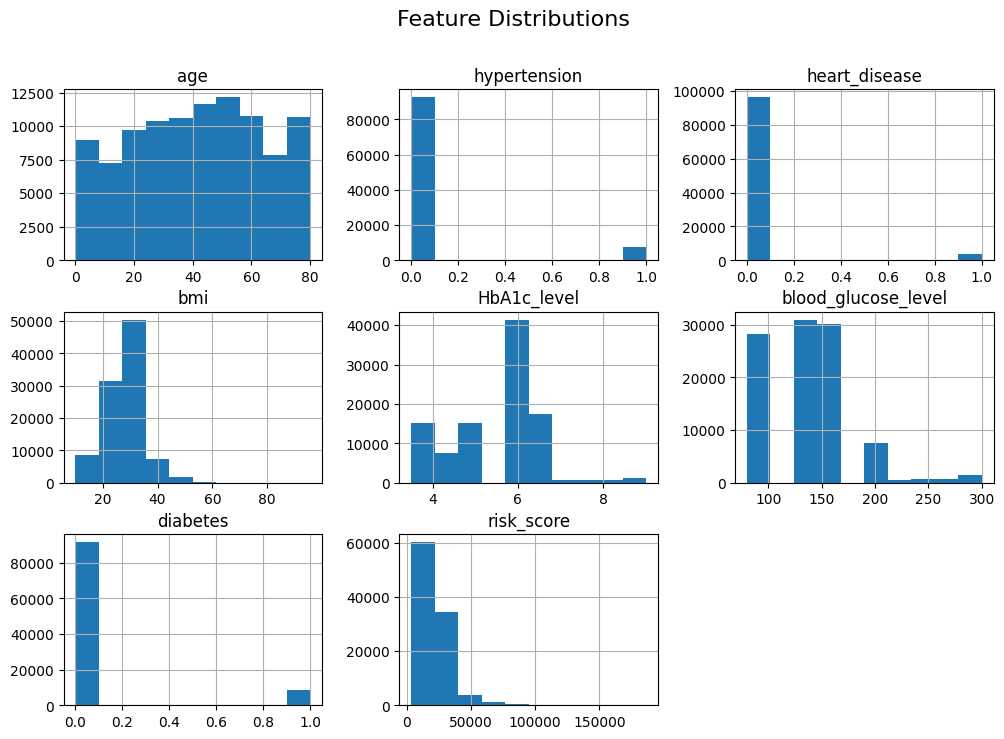

In [21]:
df.hist(figsize=(12,8))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()


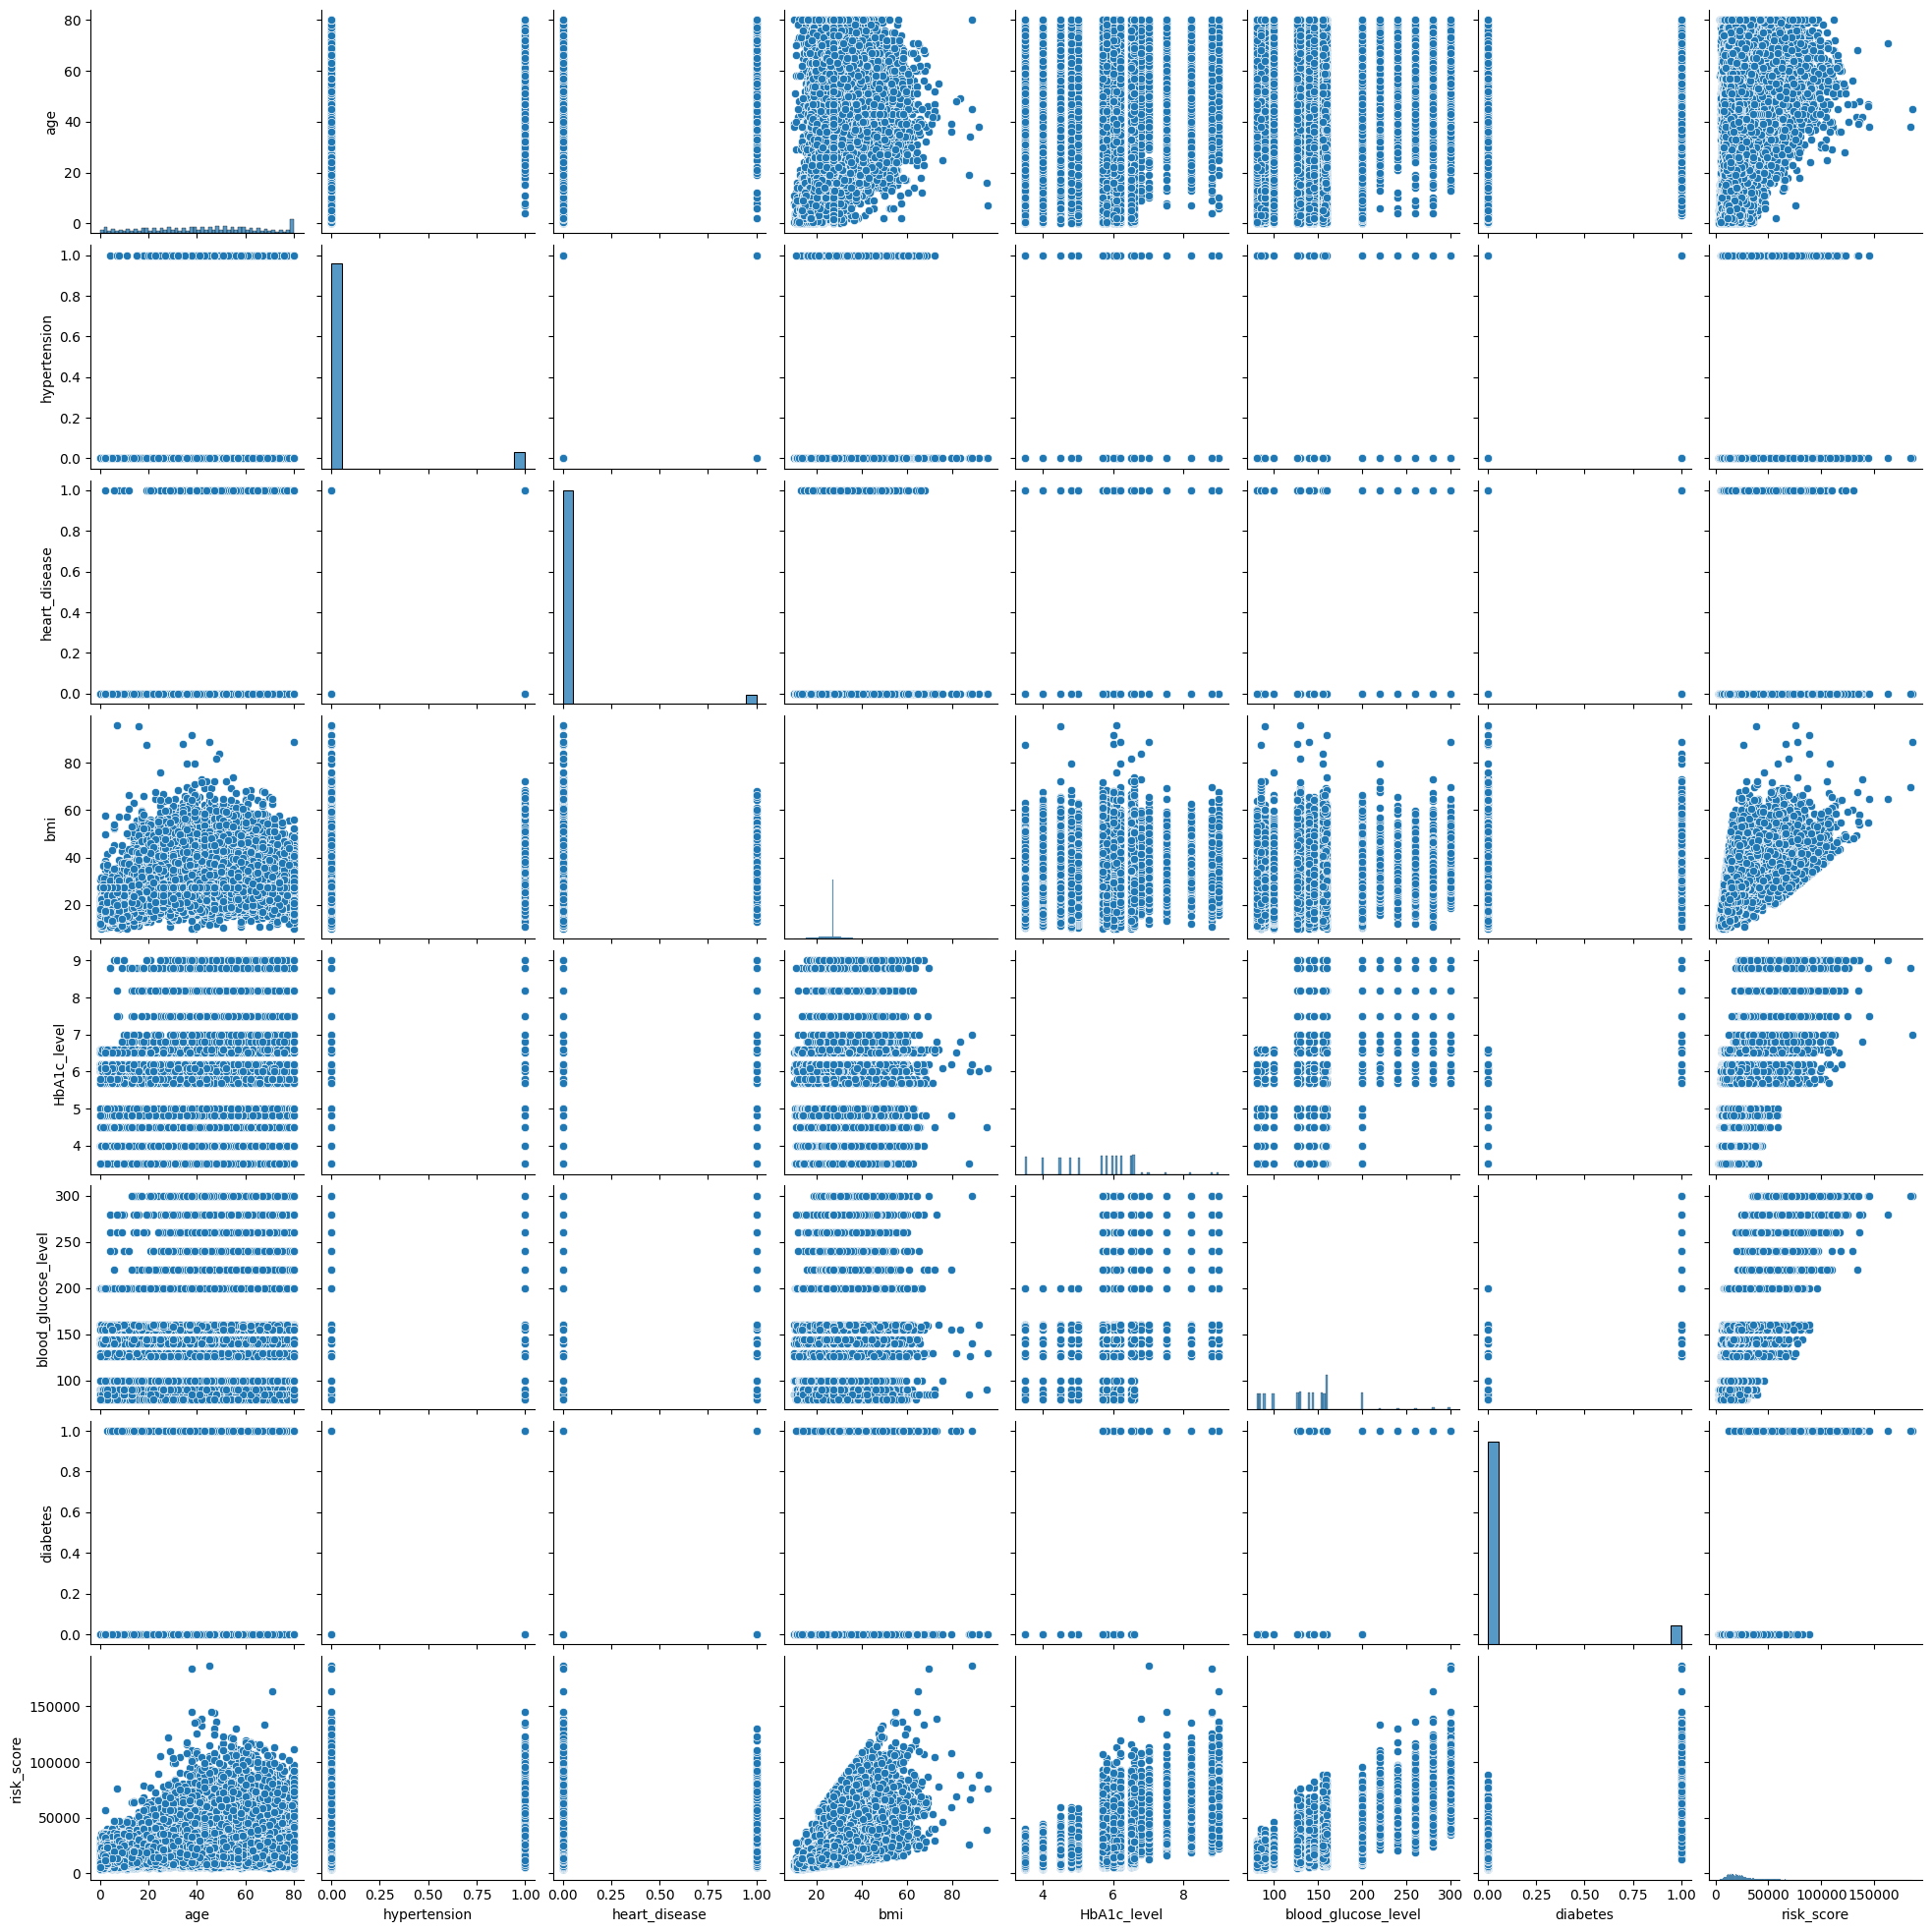

In [22]:
sns.pairplot(df)
plt.show()


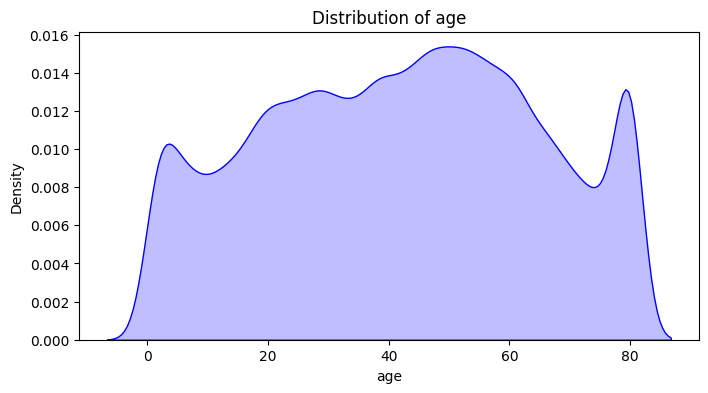

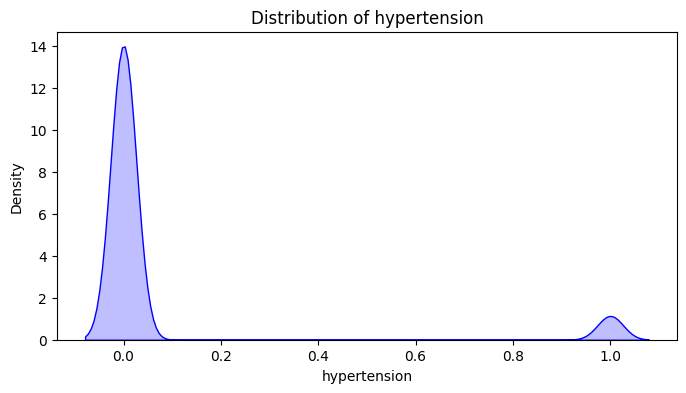

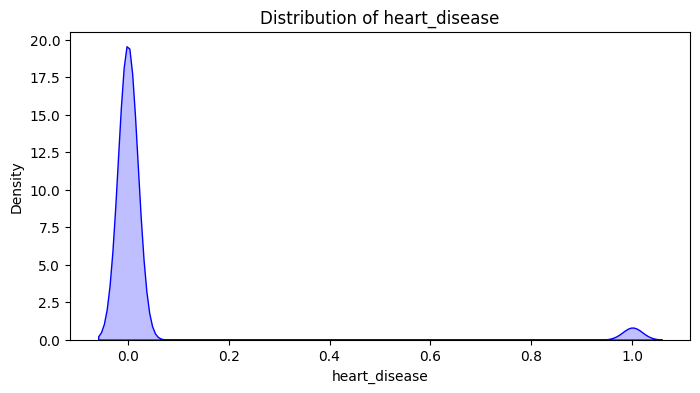

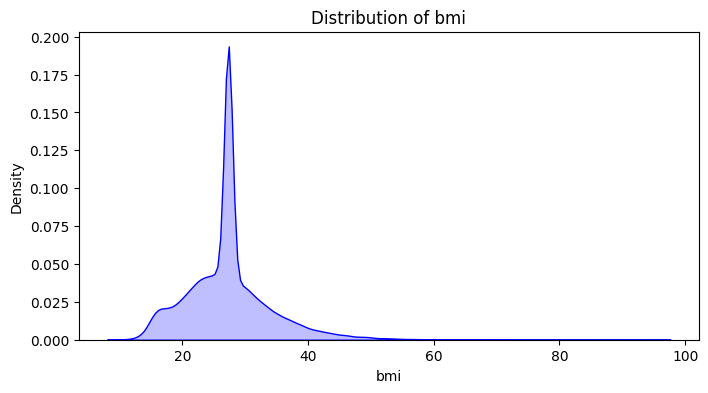

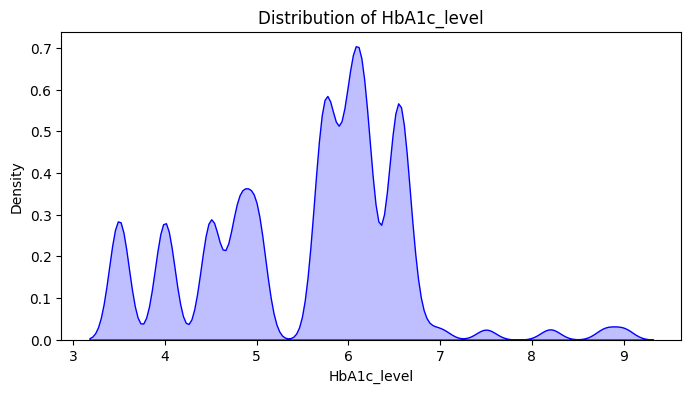

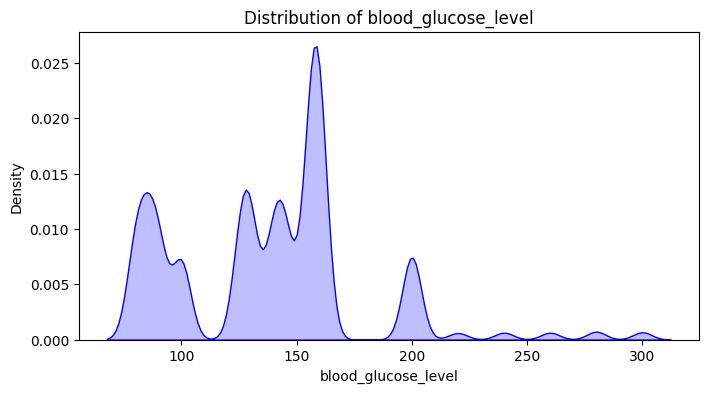

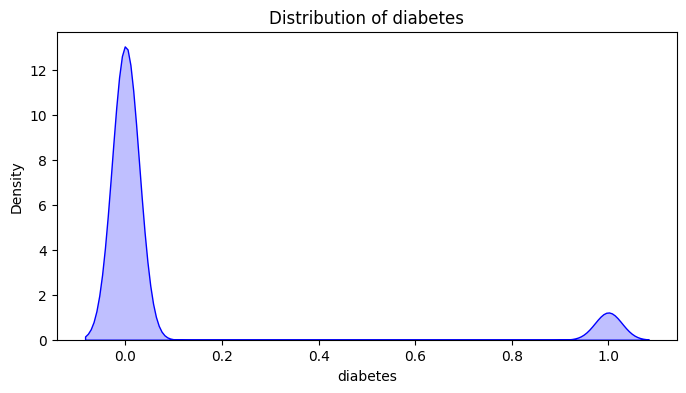

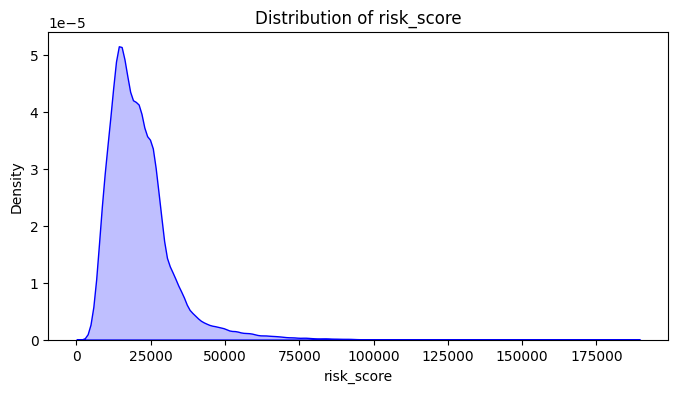

In [23]:
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df[col], fill=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()


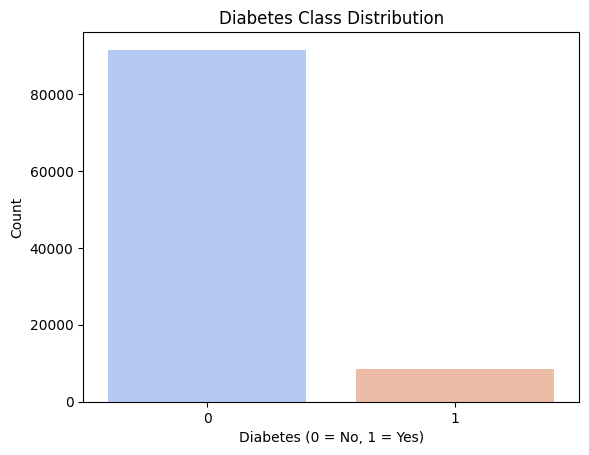

In [24]:
sns.countplot(data=df, x="diabetes", hue="diabetes", legend=False, palette="coolwarm")
plt.title("Diabetes Class Distribution")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()